<a href="https://colab.research.google.com/github/HaNyangi/HaNyangi.github.io/blob/main/5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**5. 회귀**

지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀다. 이 두가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이라는 것이다.

회귀(Regression) 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다. 또한 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법이기도 하다.

y = ax + b

- y: 종속변수
- x: 독립변수
- a: 회귀 계수(Regression coefficients)
- b: 절편(Intercept)

머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다.

회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있으며, 독립변수 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나눌 수 있다. 이 중 선형 회귀가 가장 많이 사용되는데, 선형 회귀는 실제값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다.

- 일반 선형 회귀: 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
- 라쏘(Lasso): 선형 회귀에 L1 규제를 적용한 회귀 모델. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.
- 릿지(Ridge): 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수 값을 더 작게 만드는 규제 모델
- 엘라스틱넷(ElasticNet): L1, L2 규제를 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
- 로지스틱 회귀: 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 분류에 사용되는 선형 모델. 이진 분류뿐만 아니라 희소 영역의 분류(텍스트 분류)에 뛰어난 예측 성능을 보임.

**단순 선형 회귀**

단순 선형 회귀는 독립변수와 종속변수가 각각 하나씩 있는 선형 회귀다.

1차 함수식으로 모델링할 수 있다.(Y = w0 + w1*X)

1차 함수식으로 모델링한 경우 실제값은 이러한 1차 함수 값에서 실제값만큼의 오류값을 계산한 값이 된다(w0 + w1*X + 오류값)

이렇게 실제값과 회귀 모델의 차이에 따른 오류값을 잔차라고 부른다. 최적의 회귀 모델은 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 의미하며, 이는 잔차 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미다.

잔차는 +나 -가 될 수 있으므로, 전체 데이터의 오류합을 구하기 위해 단순히 더하면 값이 크게 줄어들 수 있다. 따라서 보통 오류합을 계산할 떄는 절댓값을 취해 더해거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구한다. 즉 Error의 제곱은 RSS을 의미한다.

RSS는 변수가 w0, w1.... 인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 회귀의 핵심이다. RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수가 중심 변수임을 인지하는 것이 매우 중요하다.(독립변수와 종속변수는 모두 상수다)

- 예측값: w0 + w1*X
- 오류값: 실제값 - 예측값, 즉 Y - (w0 + w1*X)
- RSS: 오류값의 제곱의 평균(실제로는 MSE 이나 책에 기재된 대로 RSS로 통일한다)

회귀에서 이 RSS는 비용(Cost)이며 회귀 계수(w 변수)로 구성되는 RSS를 비용 함수라고 한다. 회귀 알고리즘은 데이터를 계속 학습하면서 비용 함수가 반환하는 값(오류값)을 지속적으로 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 합수를 손실 함수(loss function)라고도 한다.


**경사 하강법(Gradient Descent)**

비용 함수가 최소가 되는 w 파라미터를 구하는 것이 핵심이다. w 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 w 변수값을 도출할 수 있겠지만, w 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵다. 경사 하강법은 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식이다.

경사 하강법은 "데이터를 기반으로 알고리즘이 스스로 학습한다"는 머신러닝 개념을 가능하게 만들어준 핵심 기법이며, "점진적으로" 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식이다. 이와 같은 방식으로 회귀 분석 뿐만 아니라 신경망에서도 경사 하강법을 통한 학습을 수행한다.

경사 하강법의 핵심은 오류가 작아지는 방향으로 w 값을 보정하는 것이다. 오류가 가장 작을 때는 기울기가 가장 최소일 때를 의미한다. 즉, 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트하여 마침내 더 이상 미분된 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환한다.

- Step 1: w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
- Step 2: w1과 w0를 비용 함수를 미분한 결과 값으로 업데이트한 후 다시 비용 함수의 값을 계산한다.
- Step 3: 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2를 반복하여 w1와 w0을 업데이트 한다.

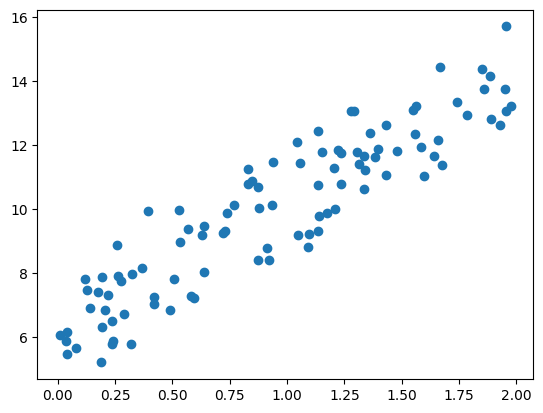

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1) # rand(m, n)는 0 ~ 1의 범위에서 균등하게 추출하여 (m, n) 배열을 생성
y = 6 +4 * X+ np.random.randn(100,1) # randn(m, n)은 평균 0, 표준편차 1의 표준정규분포에서 임의의 수를 추출한 뒤, 그 수를 바탕으로 하는 (m, n) 배열을 생성

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수를 생성한다.

입력 배열 X 값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0 으로 구한다.

100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적이다.

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # 예측값
    diff = y - y_pred # 오류값

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1)) # w0은 절편이므로 오류값을 바로 업데이트 한다.

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # 비용함수를 편미분한 공식, w1은 X와 관련이 있으므로 X와 오류값을 계산하여 업데이터
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # 비용함수를 편미분한 공식, w0은 절편이므로 오류값을 바로 업데이트, 1값을 가진 행렬을 통해 행렬곱하면 오류값 스스로가 나온다.

    return w1_update, w0_update

In [ ]:
# 경사하강법 업데이트 값 예시
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0 # 예측값
diff = y - y_pred # 오류값
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [ ]:
# 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화, 초기값을 0으로 두어 지속적으로 업데이트
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # 현재 w1 값에서 비용함수를 편미분한 공식을 지속적으로 빼서 최적 w1 값을 찾음
        w0 = w0 - w0_update # 현재 w0 값에서 비용함수를 편미분한 공식을 지속적으로 빼서 최적 w0 값을 찾음

    return w1, w0

In [ ]:
# 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0 # 회귀 분석 독립변수 X 값에 따른 종속변수 y_pred 도출
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


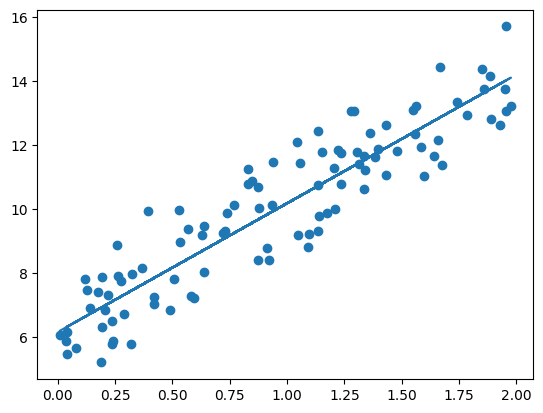

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

위와 같이 경사 하강법을 이용해 회귀선을 만들 수 있다. 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용한다.

확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장한다. 따라서 대용량 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [ ]:
# 미니 배치 확률적 경사 하강법
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind) # np.random.seed는 랜덤값을 발생 시키는 시드로, 시드 안의 숫자에 따라 정해진 랜덤값을 수동으로 설정하여 랜덤값을 예측할 수 있다. 알고리즘의 random_state 파라미터와 유사하다. 해당 함수를 앞서 선언할 경우 이후 랜덤값은 정해진 값으로 출력된다.
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0]) # np.random.permutation는 시퀸스를 무작위로 치환하거나 취환된 범위를 반환해주는 함수, X shape 만큼 무작위 숫자를 섞어 반환한다.
        sample_X = X[stochastic_random_index[0:batch_size]] # 무작위로 섞인 값의 0번째부터 batch_size 번째만큼 추출
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


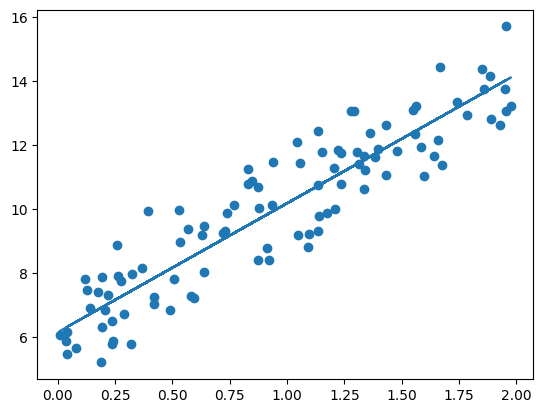

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

미니 배치 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w 파라미터와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 큰 차이가 없다.

피처가 여러 개인 경우에도 이와 같이 유사하게 도출할 수 있다.

피처가 한 개인 경우의 예측값 Y = w0 + w1*X로 회귀 계수를 도출하듯이, 피처가 M개(X1, X2 ... X100) 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개가 도출된다. 이렇게 회귀 계수가 많아지더라도 선형대수를 이용해 예측값을 도출할 수 있다.

데이터 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2 ... w100을 W 배열로 표기하면 예측 행력은 Y = np.dot(Xmat, W.T) + w0로 구할 수 있다.

**LinearRegression을 이용한 보스턴 주택 가격 예측**

사이킷런의 LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스다. fit() 매서드로 X, y 배열을 입력받으면 회귀 계수인 W를 coef_ 속성에 저장한다

LinearRegression(fit_intercept, normalize, copy_X, n_jobs)

- fit_intercept: 디폴트는 True, 절편 값을 계산할 것인지 말지를 지정한다. False로 지정하면 절편은 0으로 지정
- normalize: 디폴트는 False, fit_intercept가 False인 경우 이 파라미터가 무시된다. 만일 True인 경우 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.
- copy_X: 입력 데이터를 복사할지 여부
- n_jobs: 데이터 분석에 사용할 코어의 갯수, 디폴트는 1, -1을 입력하는 경우 사용가능한 모든 코어를 사용

반환 속성

- coef_: fit() 매서드를 수행했을 때 최귀 계수가 배열 형태로 저장. shape는 (Target 값 개수, 피처 개수)
- intercept_: 절편 값

OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 측 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이를 다중 공선성(multi-collinearity)이라 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있다.

**회귀 평가 지표**

회귀 평가를 위한 지표는 실제값과 회귀 예측값의 차이 값을 기반으로 한 지표다. 오류값(실제값과 예측값의 차)를 모두 합하면 +와 -가 섞여서 오류가 상쇄된다. 이 때문에 오류의 절대값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

- MAE(Mean Absolute Error): 오류값을 절대값으로 씌운 후 평균한 것
- MSE(Mean Squared Error): 오류값을 제곱한 후 평균한 것
- RMSE(Root Mean Squared Error): MSE에 루트를 씌운 것
- MSLE(Mean Squared Log Error)
- RMSLE(Root Mean Squared Log Error)
- R²: 예측값 분산 / 실제값 분산, 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

평가지표 적용(사이킷런 평가 지표 API / GridSearchCV Scoring 함수 적용 값)

- MAE: metrics.mean_absolute_error / 'neg_mean_absolute_error'
- MSE: metrics.mean_squared_error / 'neg_mean_squared_error'
- RMSE: metrics.mean_squared_error(squared=False) / 'neg_root_mean_squared_log_error'
- MSLE: metrics.mean_squared_log_error / 'neg_mean_squared_log_error'
- R²: metrics.r2_score / 'r2'

GridSearchCV Scoring 함수에 회귀 평가 지표를 적용할 때 주의할 점이 있다. neg는 음수값을 의미하며, 평가지표에 -1을 곱한 값이다. Scoring 함수는 클수록 좋은 결과로 평가하기 때문에, 오류값이 작을수록 좋은 회귀 평가 지표를 사용할 수 없다. 따라서 회귀 평가 지표에 -1을 곱해 클수록 좋은 결과로 평가할 수 있도록 보정한다.(10 > 1이지만 -10 < -1이다)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# boston 데이타셋 로드, sklearn 1.2 버전 이후 부터는 load_boston()을 통해서 호출할 수 없음.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns = columns)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율

In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


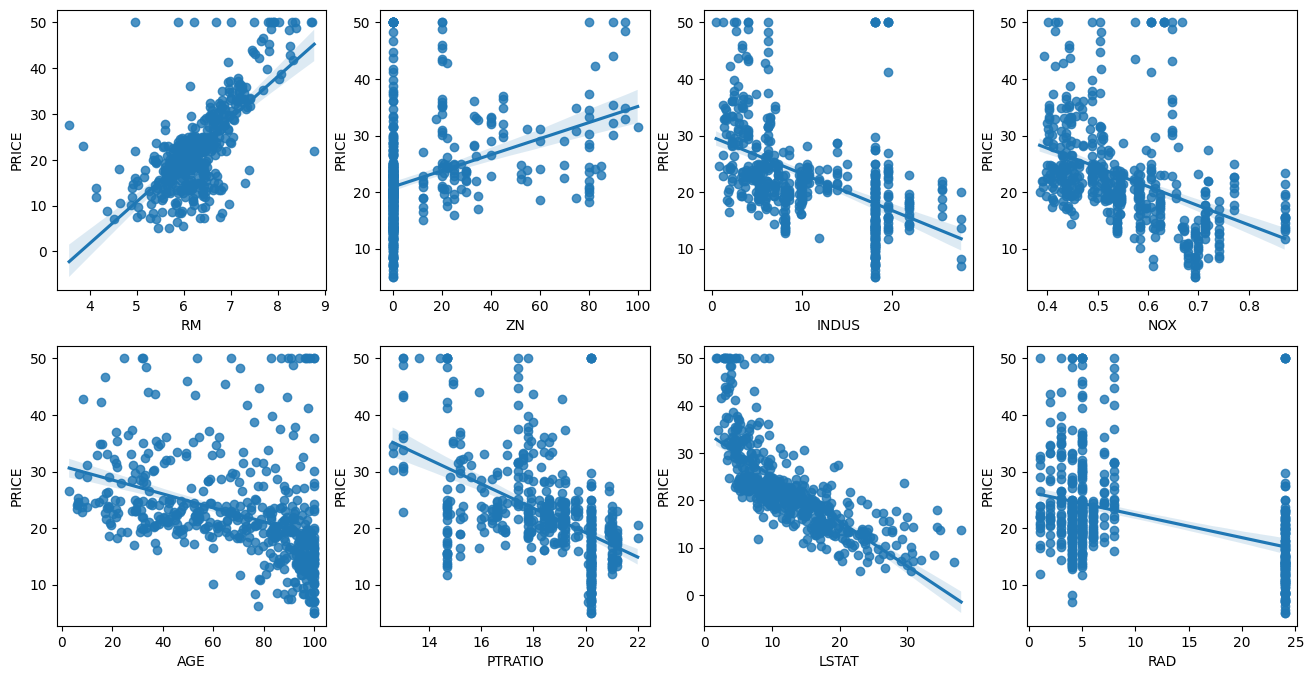

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4) # 몫 값을 row로 설정
    col = i%4 # 나머지 값을 col로 설정
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

fig1 = plt.gcf() # plt.gcf()로 현재의 Figure 객체를 구할 수 있다.
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight') # savefig() 함수에 파일 이름을 입력하면 이미지 파일이 저장된다, bbox_inches: 그림 저장 영역, dpi: 해상도 설정

RM과 LSTAT 컬럼이 PRICE 컬럼과의 영향도가 가장 두드러진다. RM(방 개수) 컬럼은 양 방향의 선형성(Positive Linearity)이 크고, LSTAT(하위 계층의 비율) 컬럼은 음 방향의 선형성(Negative Linearity)이 크다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형회귀분석 알고리즘
from sklearn.metrics import mean_squared_error, r2_score # MSE, R2 Score 평가지표

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = mean_squared_error(y_test, y_preds, squared=False)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:',lr.intercept_) # model.intercept_ 로 절편 확인
print('회귀 계수값:', np.round(lr.coef_, 1)) # model.coef_ 로 회귀계수 확인, 피처 순서대로 회귀계수 ndarray를 반환

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM은 양의 값으로 회귀 계수가 가장 크고, NOX는 음의 값으로 회귀 계수가 가장 크다.

In [ ]:
from sklearn.model_selection import cross_val_score # 폴드를 설정하여 반복적으로 학습과 예측을 수행하고 평가 결과를 반환하는 함수

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # np.sqrt를 통해 루트를 씌운다
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE: {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE: 5.829 


**다항 회귀(Polynomial Regression)과 과적합(Overfitting)/과소적합(Underfitting)**

회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀(Polynomial Regression)라고 한다.

다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀를 것을 기억해야한다. 회귀에서 선형/비선형 회귀를 나눈 기준은 회귀 계수의 선형/비선형 여부지 독립변수의 선형/비선형 여부와는 무관하다.